In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.optimize as opt
import csv

import matplotlib
matplotlib.rcParams['figure.dpi'] = 50

In [38]:
#Set phase guess and pulse time for Pupillo gate
 # in Omega*t dimension-less units
resolution = 200 # number of phase steps in the pulse
# PhaseGuess = [(-0.5*np.sin(2*np.pi*x/pulse_time)-0.5) for x in np.linspace(0,pulse_time,resolution)] #input a phase profile guess 
Omega_Rabi1=2*np.pi*2 #MHz
Omega_Rabi2=2*np.pi*2 #MHz
pulse_time=6.7
Blockade = 20 #2*np.pi*100  #MHz
R_lifetime = 12000000 # microseconds
Delta1=0
Delta2=2

delta1=0
delta1=0

phi_offset1=-0.7318
phi_offset2=-2.44
phi_offset3=-5.15
phi_offset4=-.5


#Mark's Parms

Amp1=2*np.pi*0.1122
Amp2=0.1
Amp3=0.01
Amp4=0.01


f1=1.043*Omega_Rabi1
f2=1.043*Omega_Rabi1*2
f3=1.043*Omega_Rabi1*4
f4=1.043*Omega_Rabi1*8

inputs=[pulse_time,delta1,Amp1,f1,phi_offset1]



inputs=[pulse_time,delta1,Amp1,f1,phi_offset1,Amp2,phi_offset2,f2,Amp3,phi_offset3,f3,phi_offset4,f4,Amp4]


In [14]:
#ADD FINITE RYDBERG BLOCKADE STRENGTH
def pulse_gate_infidelity_opt_two_level(inputs):
    def loss_function(inputs):
        #Define inputs
        pulse_time_f=inputs[0]
#         pulse_time_f=pulse_time#inputs[0]
        Delta_f1=inputs[1]
        Omega_Rabi_f1=Omega_Rabi1
        Amp_f1=inputs[2]
        f1_f1=inputs[3]
        phi_offset_f1=inputs[4]
        Omega_Rabi_f2=Omega_Rabi2
        Amp_f2=inputs[5]
        f1_f2=inputs[7]
        phi_offset_f2=inputs[6]
        Amp_f3=inputs[8]
        phi_offset_f3=inputs[9]
        f1_f3=inputs[10]
        phi_offset_f4=inputs[11]
        f1_f4=inputs[12]
        Amp_f4=inputs[13]
        #define phase profile as a function of time based on inputs
        #phase profile with 2 Cosine terms
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess
        # phase profile with 1 cosine term for testing
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)+Amp_f3*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**3+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**3 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)+Amp_f3*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3)+Amp_f4*np.cos((t-pulse_time_f/2)*((f1_f4)/Omega_Rabi_f1)-phi_offset_f4) for t in np.linspace(0,pulse_time_f,resolution)]
        phases = PhaseGuess
        times=np.linspace(0,pulse_time_f,resolution+1) # Time in dimensionless units omega_rabi*t
        #Blockade = inputs[7] #Rydberg blockade strength in MHz

        
        DecayRate=(1/R_lifetime)/(Omega_Rabi1) # Decay rate normalized with Rabi frequency
        B = Blockade/Omega_Rabi1 # normalize the blockade with the Rabi frequency
        psi01 = np.array([1,0,0], complex)  # single atom state ground and Rydberg
        psi11 = np.array([1,0,0,0,0,0,0], complex) # two atom state ground-ground, ground-Rydberg, Rydberg-Rydberg
        for i in range(resolution):  #loop over small time increments and apply small unitary rotations at each step
            dt = times[i+1]-times[i]  #time increment difference
            Omega1 = 1*np.exp(1j*phases[i])  #set up the complex Rabi frequency for m=-1/2
            Omega2 = (Omega_Rabi2/Omega_Rabi1)*Omega1  #set up the complex Rabi frequency for m=+1/2
            H01 = 0.5*np.array([[0, Omega1, Omega2], [np.conj(Omega1), Delta1, 0], [np.conj(Omega2), 0, Delta2]]) #Hamiltonian for one atom
            if B is None:
                H11 = np.sqrt(2)*H01
            else:
                H11 = np.sqrt(2)*0.5*np.array([[0, Omega1, Omega2, 0,0,0,0], [np.conj(Omega1), Delta1, 0, Omega1, Omega2, 0, 0], [np.conj(Omega2), 0, Delta2, 0, Omega1, Omega1, Omega2], [0, np.conj(Omega1), 0, 2*Delta1+B, 0,0,0], [0, np.conj(Omega2), 0, 0, Delta1+Delta2+B, 0, 0], [0, 0, np.conj(Omega1), 0, 0, Delta1+Delta2+B, 0], [0, 0, np.conj(Omega2), 0, 0, 0, 2*Delta2+B]]) # Hamiltonian for two atoms
            psi01 = scipy.linalg.expm(-1j*H01*dt)@psi01  #evolve input 1 atom state in time
            psi11 = scipy.linalg.expm(-1j*H11*dt)@psi11  #evolve 2 atom state
        # extract phases and populations to calculate the fidelity
        phase = psi01[0]/np.abs(psi01[0]) # Calculate the phase shift induced on the ground state for 1 atom
        psi01/=phase  # divide 1 atom state by phase shift
        psi11/=phase**2 #divide 2 atom state by 1 atom phase shift on each atom
        psi01 /= np.linalg.norm(psi01)
        psi11 /= np.linalg.norm(psi11)
        # Bell state fidelity based on ground state populations for the 1 atom and 2 atom case.
        # The relative phase shifts between the two psi01[0] and psi11[0] are also accounted for in this calculation
        # For perfect fidelity, there will be a pi phase shift between the two t
        F_bell = 1/16*np.abs(1+2*psi01[0]-psi11[0])**2
        F_av = 16/20*F_bell + 1/20*(1+2*np.abs(psi01[0])**2+np.abs(psi11[0])**2)
        return (1-F_bell)
    def callback(inputs):
        infid = loss_function(inputs)
        print("Infidelity: {}".format(infid), end = '\r', flush=True)
    inF_bell = scipy.optimize.minimize(loss_function,
                                      inputs,
                                      callback=callback,
                                      options = {'gtol': 1e-6})
    return inF_bell.fun, inF_bell.x

In [15]:
infid, parms=pulse_gate_infidelity_opt_two_level(inputs)

In [6]:
parms

array([ 7.21898073e+00,  2.52079664e+02,  1.38325745e+02,  5.71959055e+00,
       -1.63890181e+00, -7.59018791e+01, -1.65884766e+00,  7.12773518e+00,
       -4.51409600e-01, -5.42201694e+00,  5.23397377e+01,  7.77969325e-01,
        9.78430765e+01, -1.66654008e-01])

In [7]:
pulse_time_f=parms[0]
Delta_f1=parms[1]
Omega_Rabi_f1=Omega_Rabi1
Amp_f1=parms[2]
f1_f1=parms[3]
phi_offset_f1=parms[4]
# Omega_Rabi_f2=Omega_Rabi2
Amp_f2=parms[5]
f1_f2=parms[7]
phi_offset_f2=parms[6]
# Amp_f3=parms[7]
# f1_f3=parms[8]
# phi_offset_f3=parms[9]

phases=[((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess

<>:18: SyntaxWarning: invalid escape sequence '\O'
<>:18: SyntaxWarning: invalid escape sequence '\O'
C:\Users\QC\AppData\Local\Temp\ipykernel_2948\1879152821.py:18: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel("Time $t\Omega_0$")


Text(0.95, 0.95, 'Blockade Strength = 20 \n\n Infidelity: 0.00181')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

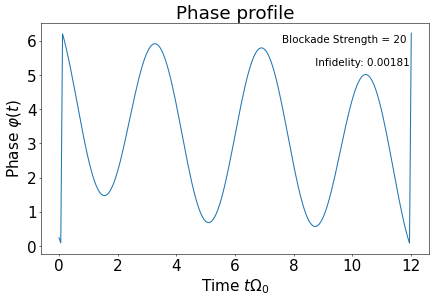

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

times_list = []
interpolation = []

for i in range(resolution):
    times_list.append(np.linspace(0,parms[0],resolution + 1)[i])

# fig, ax = plt.plot(figsize = (8,8))
plt.figure(figsize=(10,6))
plt.plot(times_list, (np.array(phases)-2.2)%(2*np.pi))
plt.title("Phase profile")
plt.ylabel("Phase $\\varphi(t)$")
plt.xlabel("Time $t\Omega_0$")
plt.text(.95, 0.95, "Blockade Strength = 20 \n\n Infidelity: {:.5f}".format(infid), transform=plt.gca().transAxes,
         fontsize=15, verticalalignment='top', horizontalalignment='right')


In [39]:
import numpy as np
import scipy.linalg
import scipy.optimize as opt
# --- CRAB basis setup ---
K = 8  # number of sinusoidal components in your phase ansatz
# pick omegas uniformly in [0.5, 5]×Ω₀
omegas = np.random.uniform(0.5*Omega_Rabi1,
                            5.0*Omega_Rabi1,
                            size=K)


# --- 1) compute_infidelity_from_phase_array ---
def compute_infidelity_from_phase_array(phases, times):
    """Given phase array and corresponding times, return infidelity 1-F_bell."""
    # normalize variables from notebook's globals
    Delta1_f = Delta1  # using global Delta1, Delta2 as before
    Delta2_f = Delta2
    Omega_Rabi_f1 = Omega_Rabi1
    Omega_Rabi_f2 = Omega_Rabi2
    R_life = R_lifetime
    B = Blockade / Omega_Rabi1  # normalized blockade
    # initial states
    psi01 = np.array([1, 0, 0], complex)
    psi11 = np.array([1, 0, 0, 0, 0, 0, 0], complex)
    # decay rate (unused in fidelity here, included for completeness)
    DecayRate = (1/R_life) / Omega_Rabi1
    # propagate
    for i in range(len(phases)):
        dt = times[i+1] - times[i]
        Omega1 = np.exp(1j * phases[i])
        Omega2 = (Omega_Rabi_f2 / Omega_Rabi_f1) * Omega1
        # single atom Hamiltonian
        H01 = 0.5 * np.array([
            [0, Omega1, Omega2],
            [np.conj(Omega1), Delta1_f, 0],
            [np.conj(Omega2), 0, Delta2_f]
        ])
        # two-atom Hamiltonian
        if B is None:
            H11 = np.sqrt(2) * H01
        else:
            H11 = 0.5 * np.sqrt(2) * np.array([
                [0, Omega1, Omega2, 0, 0, 0, 0],
                [np.conj(Omega1), Delta1_f, 0, Omega1, Omega2, 0, 0],
                [np.conj(Omega2), 0, Delta2_f, 0, Omega1, Omega1, Omega2],
                [0, np.conj(Omega1), 0, 2*Delta1_f + B, 0, 0, 0],
                [0, np.conj(Omega2), 0, 0, Delta1_f + Delta2_f + B, 0, 0],
                [0, 0, np.conj(Omega1), 0, 0, Delta1_f + Delta2_f + B, 0],
                [0, 0, np.conj(Omega2), 0, 0, 0, 2*Delta2_f + B]
            ])
        # evolve
        psi01 = scipy.linalg.expm(-1j * H01 * dt) @ psi01
        psi11 = scipy.linalg.expm(-1j * H11 * dt) @ psi11

    # phase correction
    phase_corr = psi01[0] / np.abs(psi01[0])
    psi01 /= phase_corr
    psi11 /= phase_corr**2
    psi01 /= np.linalg.norm(psi01)
    psi11 /= np.linalg.norm(psi11)

    # fidelity
    F_bell = (1/16) * np.abs(1 + 2*psi01[0] - psi11[0])**2
    return 1 - F_bell

# --- 2) Analytic CRAB Jacobian + Numeric φ-gradient fallback (GRAPE stub) ---
def grape_gradient(phases, times, eps=1e-3):
    """Numeric estimate of ∂loss/∂φ_j via central difference."""
    grad = np.zeros_like(phases)
    base = compute_infidelity_from_phase_array(phases, times)
    for j in range(len(phases)):
        phases_p = phases.copy(); phases_p[j] += eps
        phases_m = phases.copy(); phases_m[j] -= eps
        f_p = compute_infidelity_from_phase_array(phases_p, times)
        f_m = compute_infidelity_from_phase_array(phases_m, times)
        grad[j] = (f_p - f_m) / (2 * eps)
    return grad

def phase_crab(params, T, resolution):
    A = params[:K]
    theta = params[K:]
    t = np.linspace(0, T, resolution)
    s = np.sin(np.pi * t / T)**2
    φ = np.zeros_like(t)
    for k in range(K):
        φ += A[k] * np.sin(omegas[k] * t + theta[k])
    return s * φ, t

def loss_and_grad_crab(params):
    """Return (loss, grad) where grad is ∂loss/∂params via chain-rule."""
    φ, tlist = phase_crab(params, pulse_time, resolution)
    loss = compute_infidelity_from_phase_array(φ, np.concatenate([tlist, [pulse_time]]))
    # gradient wrt φ:
    grad_phi = grape_gradient(φ, np.concatenate([tlist, [pulse_time]]))
    # build Jacobian J[j,k] = ∂φ_j / ∂param_k
    J = np.zeros((len(φ), len(params)))
    t = tlist
    s = np.sin(np.pi * t / pulse_time)**2
    for k in range(K):
        J[:, k] = s * np.sin(omegas[k] * t + params[K + k])   # dφ/dA_k
        J[:, K + k] = s * params[k] * np.cos(omegas[k] * t + params[K + k])  # dφ/dθ_k
    # chain-rule: grad_params = J^T @ grad_phi
    grad_params = J.T.dot(grad_phi)
    return loss, grad_params



In [ ]:
# wrap to strip off the gradient
def loss_only(params):
    return loss_and_grad_crab(params)[0]

de_res = opt.differential_evolution(
    loss_only,
    bounds=[(-1,1)]*K + [(-np.pi,np.pi)]*K,
    maxiter=500,        # you can lower this to speed things up
    popsize=10,         # smaller popsize → faster but less global coverage
    disp=True
)
res = opt.minimize(loss_and_grad_crab, de_res.x, jac=True, method='BFGS')
print("Infidelity:", res.fun)